### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

### Importing dataset

In [2]:
df=pd.read_csv("avocado[1].csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape


(18249, 14)

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null or dupilcate values.

### Preparing data

In [7]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

Unnamed column has been dropped.

### Changing the date datatype to date.

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

### Changing categorical data to numerical data

In [12]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])

In [13]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

All data has been changed to either float or integer format.

Dropping the Date coulumn.

In [11]:
df.drop('Date',axis = 1, inplace = True)

### EDA

#### UNIVARIATE ANALYSIS

In [17]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


<AxesSubplot:xlabel='year', ylabel='Count'>

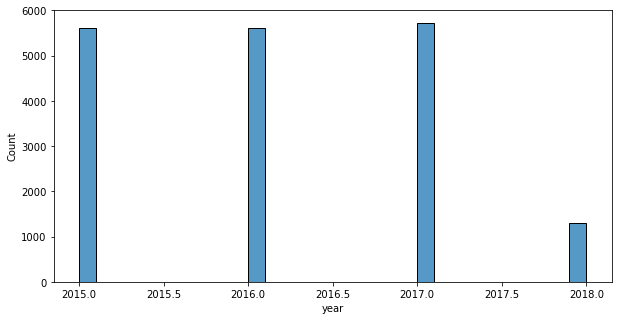

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df['year'], bins=30)

There is a severe drop in sales of avocado in year 2018

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

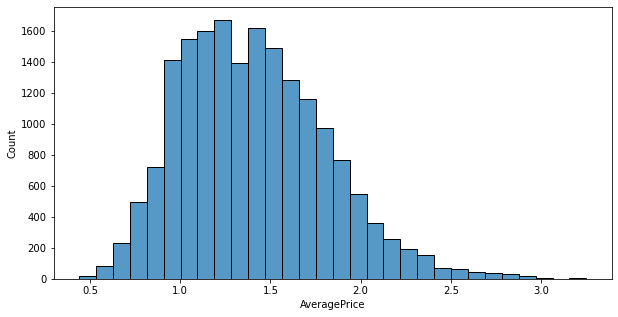

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['AveragePrice'], bins=30)

Average price have been ranging between 1-1.75.

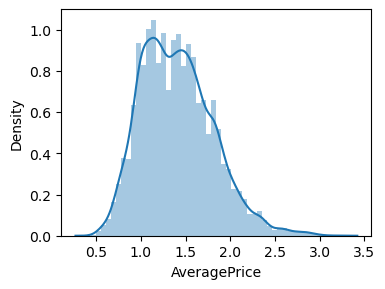

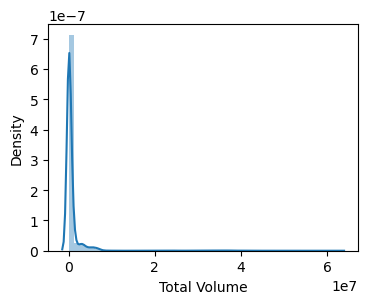

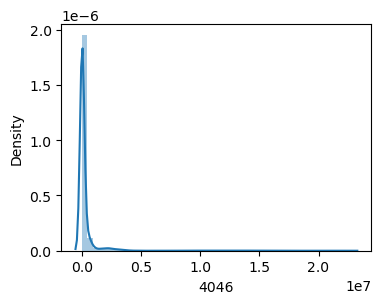

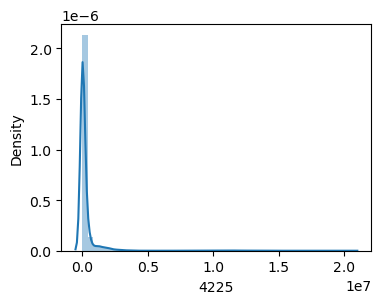

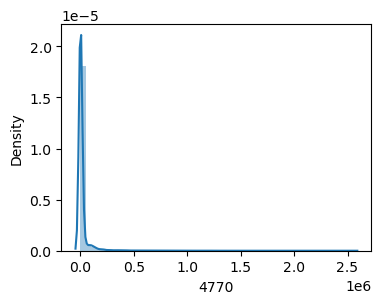

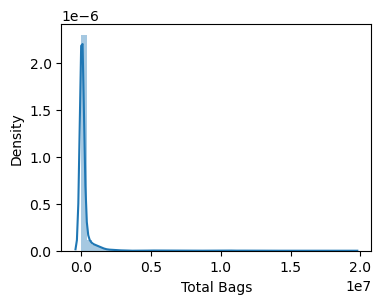

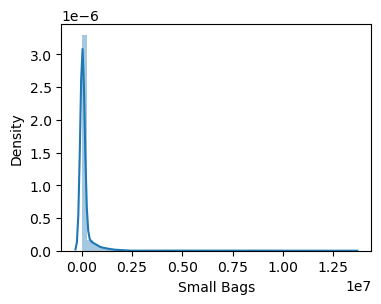

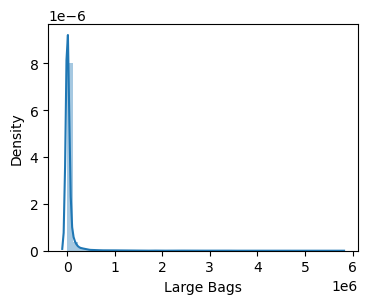

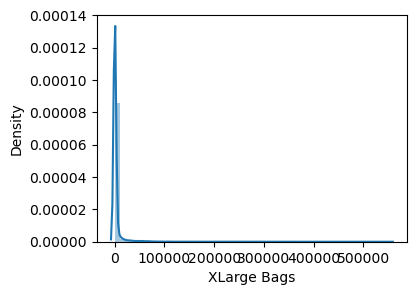

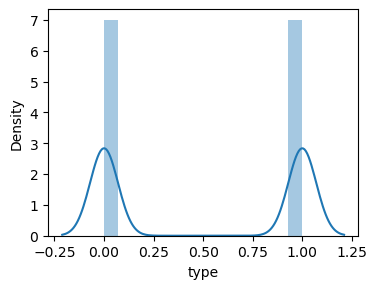

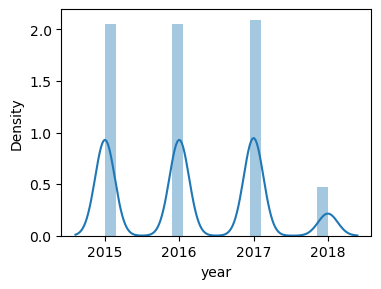

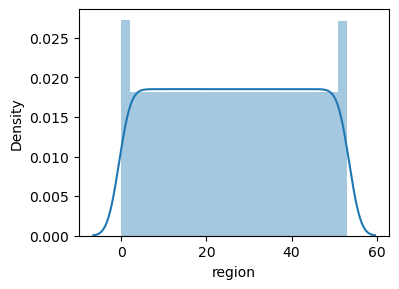

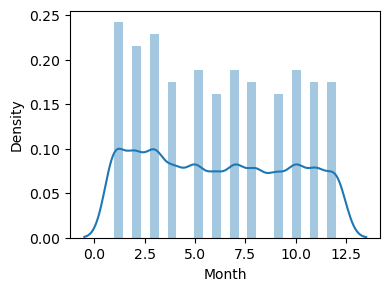

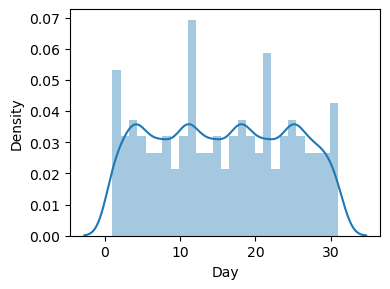

In [20]:
for col in df.columns:
    plt.figure(figsize=(4,3),dpi=100)
    sns.distplot(df[col])
    plt.show()

#### BIVARIATE ANALYSIS

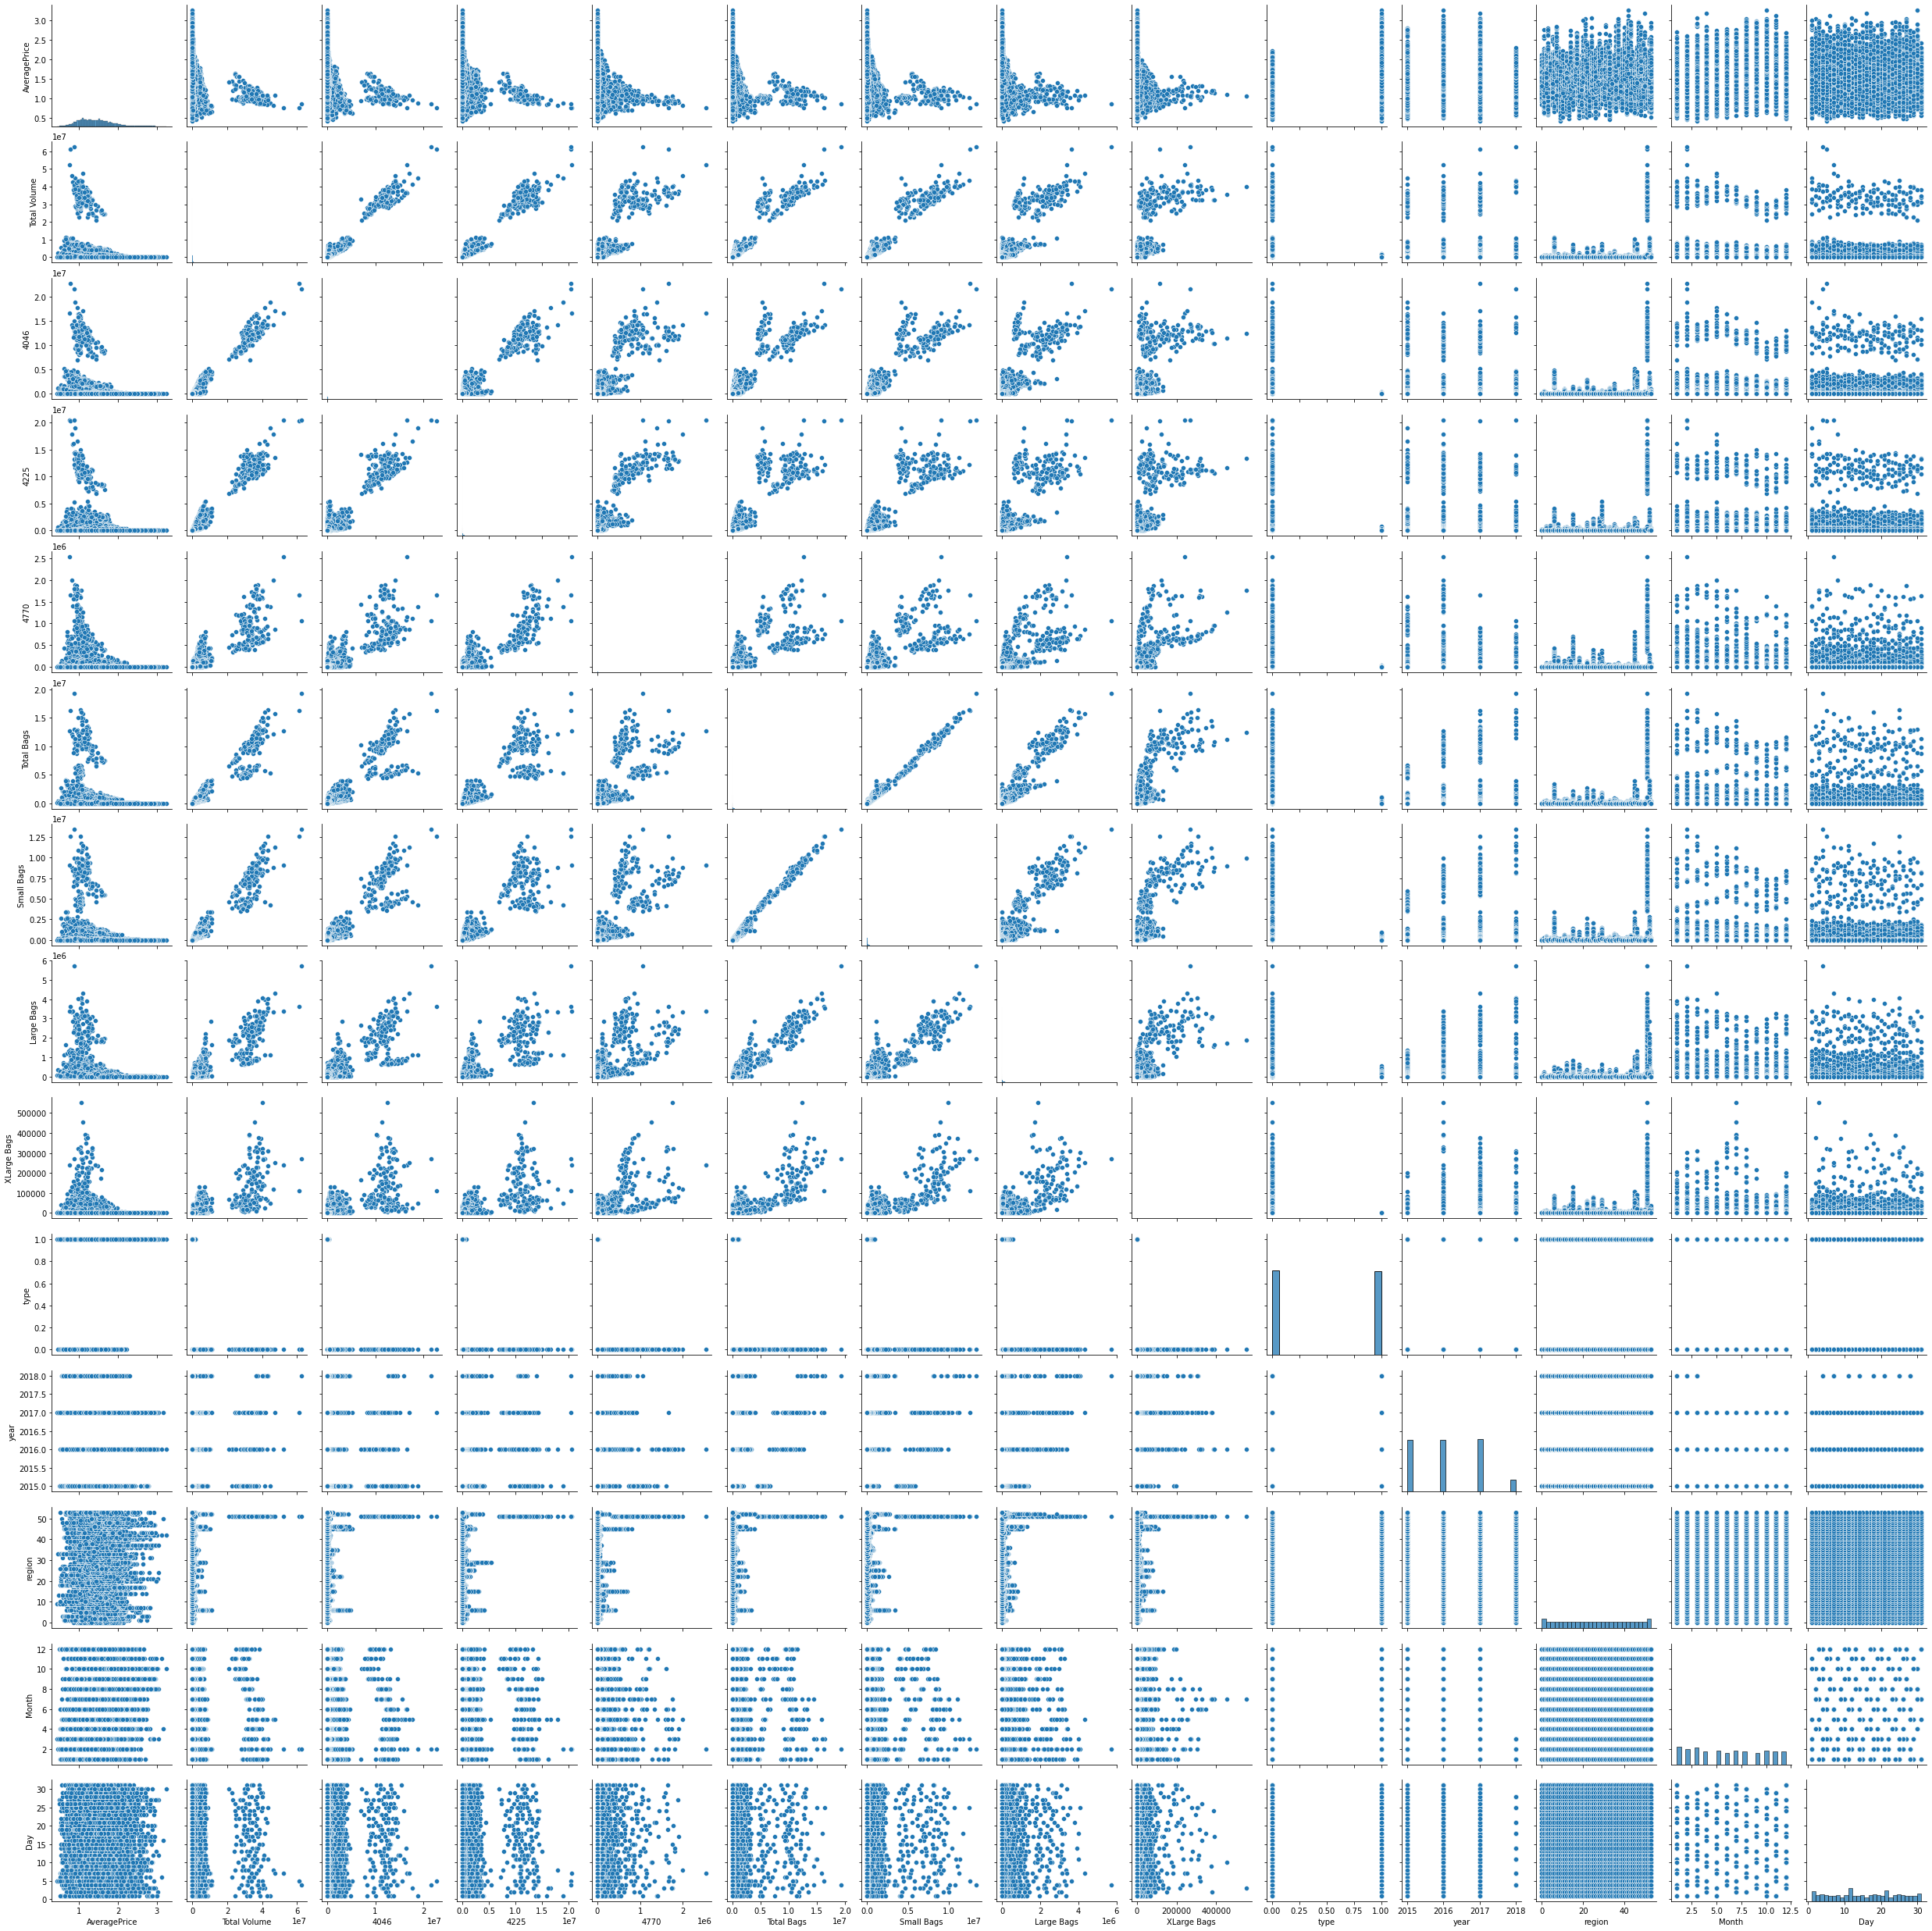

In [23]:
sns.pairplot(df)
plt.show()

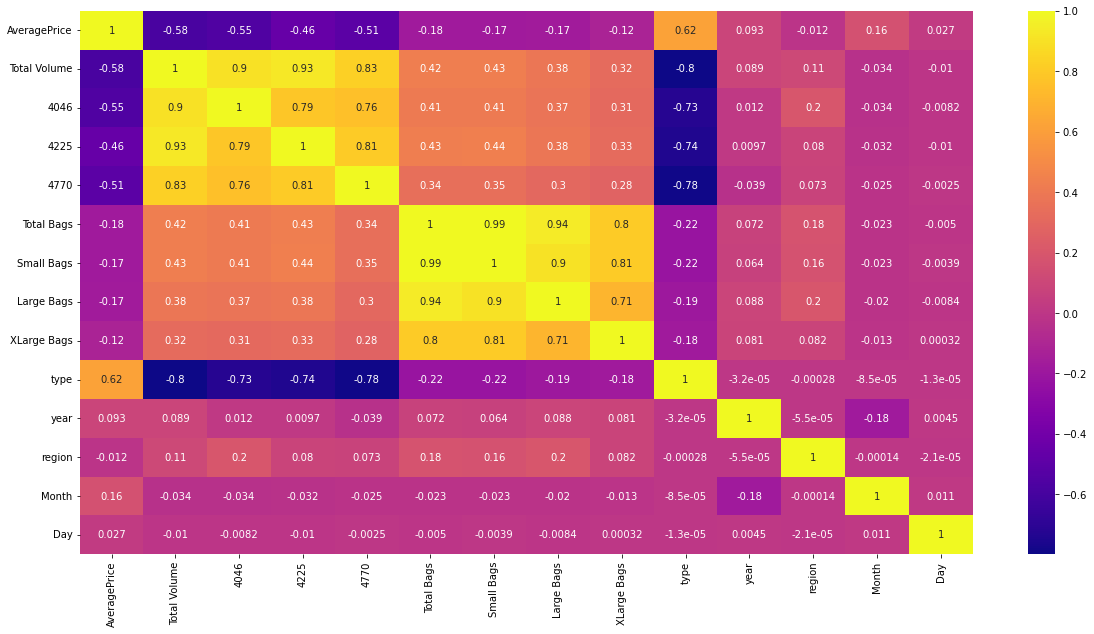

In [38]:
# heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True,cmap='plasma')
plt.show()

### Inspecting Skewness.

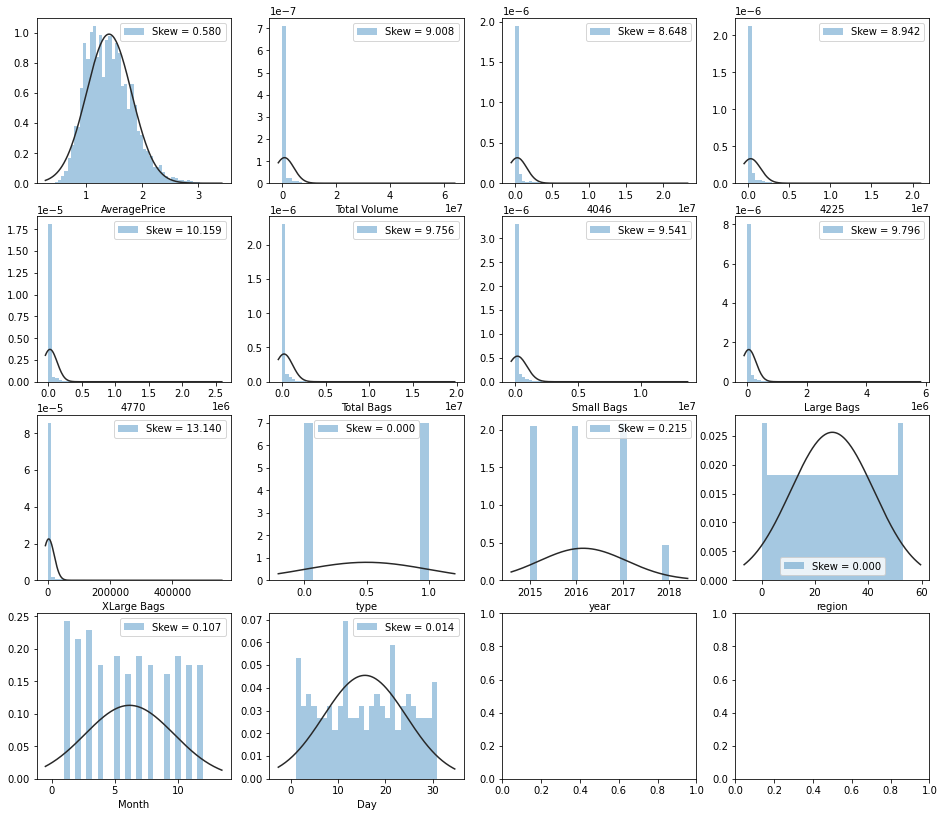

In [30]:
fig,ax = plt.subplots(4,4, figsize=(16, 14))
ax = ax.flatten()
i = 0
for col in df.columns:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

In [31]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [32]:
from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770']]=power_transform(df[['Total Volume','4046','4225','4770']],method='yeo-johnson')

df.skew()

AveragePrice     0.580303
Total Volume     0.011171
4046            -0.022679
4225            -0.017740
4770             0.032184
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

### Checking outliers using boxplot.

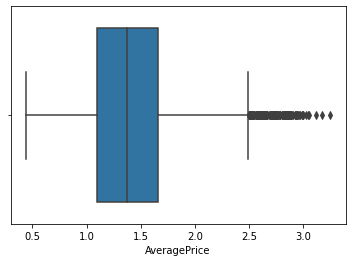

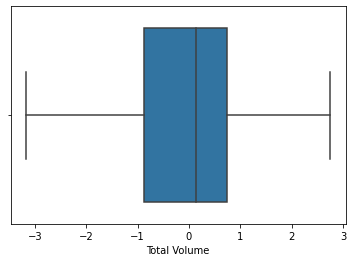

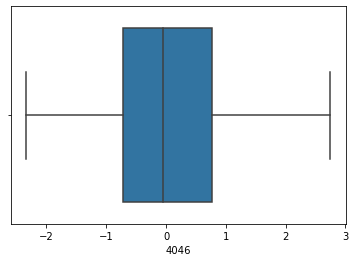

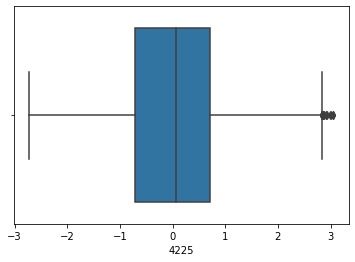

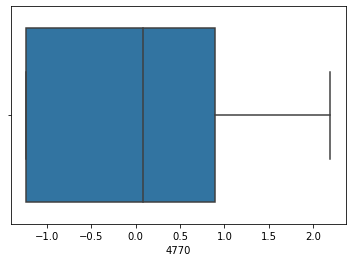

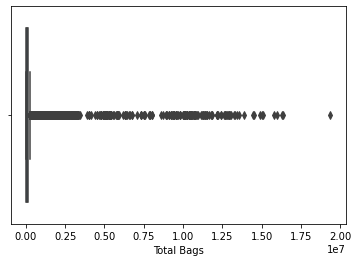

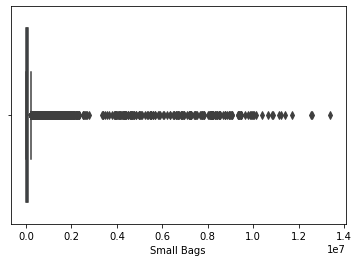

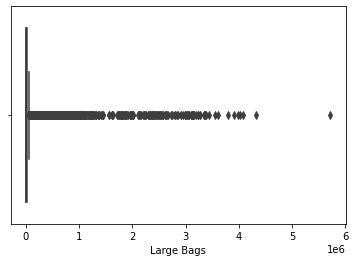

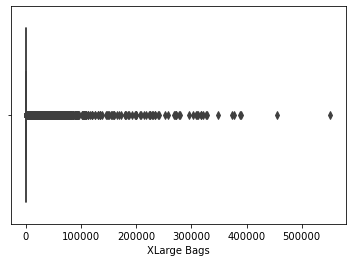

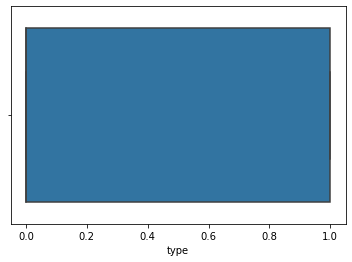

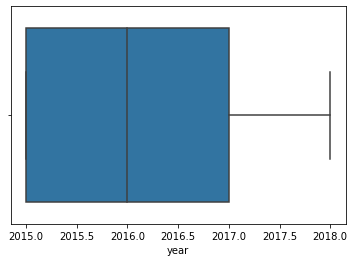

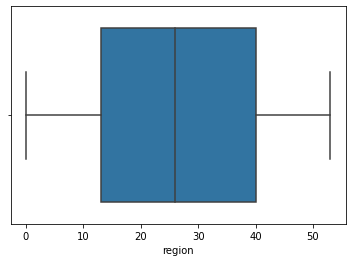

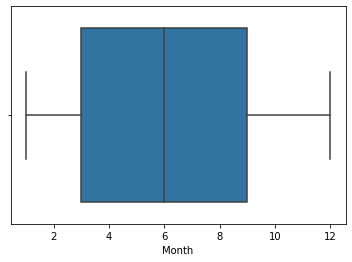

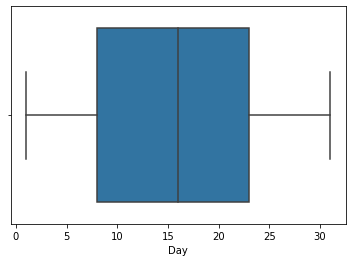

In [33]:
for col in df.columns:
    sns.boxplot(df[col])
    
    plt.show()

### Using zscore

In [34]:
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
dfn

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,0.179327,-0.731947,0.579503,-0.007072,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,0.003876,-0.634200,0.415100,-0.148322,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [40]:
# data loss
data_loss=((df.shape[0]-dfn.shape[0])/df.shape[0])*100
print(f'data loss is : {data_loss:0.1f}%')

data loss is : 2.9%


### Using linear Regressor.

In [41]:
X=dfn.iloc[:,1:-1]
y=dfn.iloc[:,0]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [42]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.5203613683974162
At random state 0, The test accuracy is :-0.5059659141236268


At random state 1, The training accuracy is :-0.5121594068337655
At random state 1, The test accuracy is :-0.5228280961297416


At random state 2, The training accuracy is :-0.5165422478682182
At random state 2, The test accuracy is :-0.5141002476538395


At random state 3, The training accuracy is :-0.5146191645124625
At random state 3, The test accuracy is :-0.5179161533054909


At random state 4, The training accuracy is :-0.5152968576987876
At random state 4, The test accuracy is :-0.5166978316910193


At random state 5, The training accuracy is :-0.5137918369635992
At random state 5, The test accuracy is :-0.5194998388370993


At random state 6, The training accuracy is :-0.5237644827944563
At random state 6, The test accuracy is :-0.49979823874471363


At random state 7, The training accuracy is :-0.5136642734098726
At random state 7, The test accuracy i

At random state 72, The test accuracy is :-0.5230907771291664


At random state 73, The training accuracy is :-0.5236237776982374
At random state 73, The test accuracy is :-0.4998589567467515


At random state 74, The training accuracy is :-0.5164484327417993
At random state 74, The test accuracy is :-0.5142139403509816


At random state 75, The training accuracy is :-0.5109284689235745
At random state 75, The test accuracy is :-0.5253029995449214


At random state 76, The training accuracy is :-0.5164017986691732
At random state 76, The test accuracy is :-0.5143567551272727


At random state 77, The training accuracy is :-0.5248042352548372
At random state 77, The test accuracy is :-0.49637372436370386


At random state 78, The training accuracy is :-0.5138571473032735
At random state 78, The test accuracy is :-0.5196788577150331


At random state 79, The training accuracy is :-0.511486689304733
At random state 79, The test accuracy is :-0.5245585070462138


At random state 80, The tr

91 is the best state

In [43]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=91)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(11873, 12) (11873,)
(5849, 12) (5849,)


### Model building.

In [44]:
lr=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [45]:
model=[lr,svr,dtr,rfr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    print("==============================================\n\n\n====================================================")

Scores for LinearRegression() are
Mean Absolute Error: 0.21098395432812916
Mean Squared Error: 0.07250876498584875
Root Mean Squared Error: 0.2692745160349355
R squared score:  0.5160178417407524
Cross Validation Score is : [0.51703855 0.51383071 0.53278607 0.4943105  0.51515871]
Mean Score : 0.5146249083041747
Difference : -0.001392933436577648


Scores for SVR() are
Mean Absolute Error: 0.1420215972550591
Mean Squared Error: 0.03739534804287815
Root Mean Squared Error: 0.19337876833530135
R squared score:  0.7503931937307146
Cross Validation Score is : [0.74314686 0.74242844 0.75157677 0.73086463 0.72859402]
Mean Score : 0.7393221425065016
Difference : -0.011071051224212924


Scores for DecisionTreeRegressor() are
Mean Absolute Error: 0.12647461104462301
Mean Squared Error: 0.0386182424346042
Root Mean Squared Error: 0.19651524733364634
R squared score:  0.7422306072193292
Cross Validation Score is : [0.7483865  0.71190624 0.71103143 0.70640176 0.70367564]
Mean Score : 0.716280313705

Best results were given by RandomeForrestRegressor.

### Hyper Parameter Tuning.

In [46]:
para ={
       'n_estimators':[100,200],
      'criterion':['friedman_mse','poisson'],
     'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
}

In [48]:
RF_grid=GridSearchCV(RandomForestRegressor(),para,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

RF_grid.best_params_

Fitting 4 folds for each of 16 candidates, totalling 64 fits


{'criterion': 'friedman_mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [49]:
rfr_final = sklearn.ensemble.RandomForestRegressor(n_estimators=100,criterion='friedman_mse',min_samples_split=2,min_samples_leaf=1)

rfr_final.fit(train_x,train_y)
rfr_final.score(train_x,train_y)
pred_final=rfr_final.predict(test_x)

print('R squared score: ', r2_score(pred_final,test_y))
score=cross_val_score(rfr_final,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())
print("Difference :",score.mean()-r2_score(pred_final,test_y))

R squared score:  0.8558010656205204
Cross Validation Score is : [0.87900199 0.86925115 0.87175862 0.86844691 0.86440493]
Mean Score : 0.8705727205965335
Difference : 0.014771654976013071


### Saving the model

In [50]:
import joblib
joblib.dump(rfr_final,'Avocado_price_rfr.obj')

['Avocado_price_rfr.obj']

In [53]:
model=joblib.load('Avocado_price_rfr.obj')

#Predict

prediction = model.predict(x_test)

prediction

array([1.0537, 1.7666, 1.9607, ..., 1.5782, 1.0132, 1.5792])

In [54]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,5839,5840,5841,5842,5843,5844,5845,5846,5847,5848
Predicted,1.0537,1.7666,1.9607,1.6812,1.1425,1.6898,1.6771,1.9962,1.1389,1.5752,...,1.7763,1.2394,1.2048,1.1722,1.8726,1.1212,1.693,1.5782,1.0132,1.5792
Original,1.0000,1.7600,1.8900,1.7900,1.1800,1.7500,1.7100,2.0600,0.9600,1.5700,...,1.8300,1.4400,1.2100,1.1500,2.3200,1.1900,1.680,1.6200,1.0100,1.5600


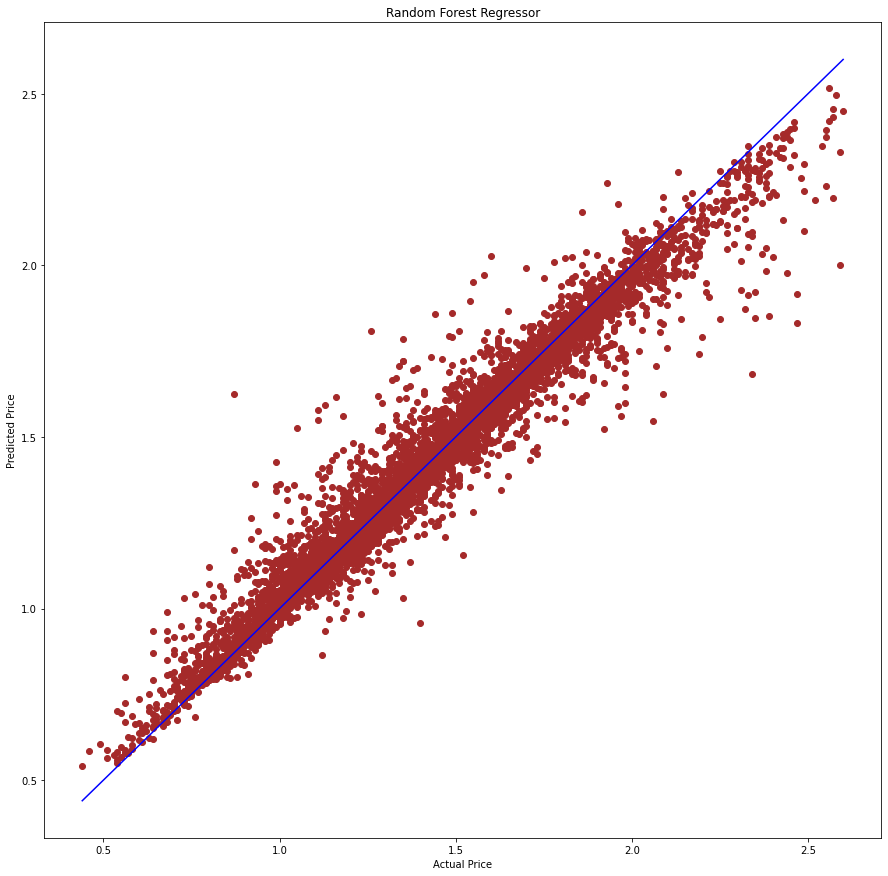

In [58]:
plt.figure(figsize=(15, 15))

plt.scatter(y_test, prediction, c ='Brown')

plt1 = max(max(prediction), max(y_test))

plt2 = min(min(prediction), min(y_test))

plt.plot([plt1, plt2], [plt1, plt2], 'b-')

plt.title('Random Forest Regressor')

plt.xlabel('Actual Price', fontsize = 10)

plt.ylabel('Predicted Price', fontsize = 10)

plt.show()

### Classification Model

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
x = dfn[df.columns.difference(['region'])]
y = dfn.region
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,4046,4225,4770,AveragePrice,Day,Large Bags,Month,Small Bags,Total Bags,Total Volume,XLarge Bags,type,year
0,-0.644408,0.366105,-0.220806,-0.190177,1.290171,-0.384554,1.646306,-0.404361,-0.432664,-0.049562,-0.261534,-1.014780,-1.208784
1,-0.767489,0.286994,-0.173506,-0.138401,0.492728,-0.384496,1.646306,-0.400935,-0.429857,-0.121710,-0.261534,-1.014780,-1.208784
2,-0.720731,0.650688,0.025041,-1.225698,-0.304716,-0.384420,1.646306,-0.406753,-0.434578,0.227939,-0.261534,-1.014780,-1.208784
3,-0.618991,0.478799,-0.119542,-0.837377,-1.102159,-0.384004,1.646306,-0.416826,-0.442678,0.044856,-0.261534,-1.014780,-1.208784
4,-0.672172,0.279841,-0.108894,-0.319617,1.518012,-0.383135,1.363761,-0.415510,-0.441385,-0.154992,-0.261534,-1.014780,-1.208784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17717,-0.445343,-0.916535,-1.235257,0.586464,-1.330000,-0.379953,-1.179139,-0.385351,-0.415999,-0.663122,-0.261534,0.985435,1.982982
17718,-0.604089,-0.650869,-1.235257,0.793568,1.404091,-0.381407,-1.461684,-0.402929,-0.430693,-0.760129,-0.261534,0.985435,1.982982
17719,-0.604036,-0.762870,0.443304,1.207777,0.606648,-0.385246,-1.461684,-0.401175,-0.430244,-0.764256,-0.261534,0.985435,1.982982
17720,-0.531646,-0.698096,0.442996,1.363105,-0.190795,-0.385142,-1.461684,-0.394497,-0.424777,-0.687634,-0.261534,0.985435,1.982982


In [63]:
x.drop(['Total Bags','Total Volume'],axis=1,inplace=True)
x.columns

Index(['4046', '4225', '4770', 'AveragePrice', 'Day', 'Large Bags', 'Month',
       'Small Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

In [66]:
x = dfn[dfn.columns.difference(['region'])]
y = dfn.region

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

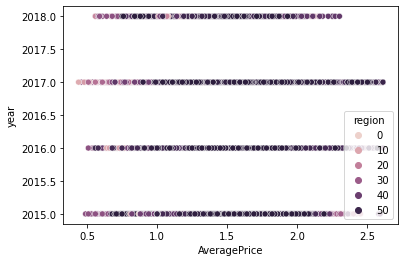

In [69]:
sns.scatterplot(x='AveragePrice', y='year', hue='region', data=dfn)